# **Project Name**    - **Cyber Attacks by Industry Sector.**




**By Priyanshu**

# **Project Summary**

**Project Objective:**

The objective of this project, “Cyber Attacks by Industry Sector”, is to analyze and derive actionable insights into global cyberattack patterns using Verizon DBIR and Kaggle datasets within the IT Security domain. The primary focus is to understand attack types, industry-specific risks, temporal trends, and breach resolution timelines, thereby supporting organizations in strengthening their cybersecurity posture.

**Through Exploratory Data Analysis (EDA), the project aims to:**

1. Examine Attack Patterns Over Time

Perform time-series analysis to uncover historical attack trends, seasonal patterns, and year-over-year shifts in threat intensity.

2. Identify Industry Vulnerabilities

Compare industries (e.g., finance, healthcare, retail, government) to highlight sectors with the highest exposure, user impact, and financial loss.

3. Explore Attack Types & Breach Timelines

Analyze the relationship between attack types (e.g., phishing, ransomware, DDoS), their financial consequences, and incident resolution times.

4. Uncover Correlations & Root Causes

Apply correlation analysis and heatmaps to study links between attack sources, vulnerabilities, defense mechanisms, and breach outcomes.

# **Problem Statement**


The increasing frequency and sophistication of cyberattacks pose a critical challenge to organizations across all industry sectors. Despite extensive reports such as the Verizon DBIR and open datasets available on Kaggle, there remains a lack of consolidated, data-driven insights that reveal:

Which industries are most vulnerable,

What attack types dominate across timelines,

How breach timelines and resolution vary, and

What economic and demographic factors influence risk exposure.

Without such analysis, businesses struggle to prioritize security investments, governments face difficulty in identifying systemic vulnerabilities, and cybersecurity teams lack evidence-based strategies to defend against emerging threats.

This project addresses the gap by conducting comprehensive Exploratory Data Analysis (EDA) to uncover attack trends, correlations, and anomalies, with a focus on attack types, industry targets, geospatial distributions, and breach timelines. The ultimate aim is to generate actionable intelligence that can guide cybersecurity policy, incident response planning, and resource allocation.

# **GitHub Link**

[GitHub Link here.](https://github.com/igpriyanshunegi/GNCIPL-Project-2)



# ***Data Analysis Start***

### Import Libraries

In [23]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

### Dataset Information

In [24]:
# Dataset Info
df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')
print("\nDataset Information: ")
print(df.info())


Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
None


### Description about Dataset

In [25]:
# Dataset Describe
print("\nDescription of the Dataset:")
print(df.describe())


Description of the Dataset:
              Year  Financial Loss (in Million $)  Number of Affected Users  \
count  3000.000000                    3000.000000               3000.000000   
mean   2019.570333                      50.492970             504684.136333   
std       2.857932                      28.791415             289944.084972   
min    2015.000000                       0.500000                424.000000   
25%    2017.000000                      25.757500             255805.250000   
50%    2020.000000                      50.795000             504513.000000   
75%    2022.000000                      75.630000             758088.500000   
max    2024.000000                      99.990000             999635.000000   

       Incident Resolution Time (in Hours)  
count                          3000.000000  
mean                             36.476000  
std                              20.570768  
min                               1.000000  
25%                              1

### Information about columns

In [26]:
# Dataset Columns
print("\nColumns Present in the Dataset:")
print(df.columns)

print("\n Data types of the columns of the dataset: ")
print(df.dtypes)


Columns Present in the Dataset:
Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

 Data types of the columns of the dataset: 
Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object


### Incident by year

In [27]:
print("\nIncidents by year:")
print(df['Year'].value_counts().sort_index())


Incidents by year:
Year
2015    277
2016    285
2017    319
2018    310
2019    263
2020    315
2021    299
2022    318
2023    315
2024    299
Name: count, dtype: int64


### Top 5 data

In [28]:
# Dataset First Look
print("\nFirst 5 Rows of the Dataset:")
print(df.head())


First 5 Rows of the Dataset:
   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Fi

### Top 7  most targeted industries

In [29]:
("\nTop 7 most targeted industries:")
print(df['Target Industry'].value_counts().head(7))

Target Industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Government            403
Telecommunications    403
Name: count, dtype: int64


### Top 6 attack types

In [30]:
print("\nTop 6 attack types:")
print(df['Attack Type'].value_counts().head(6))


Top 6 attack types:
Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64


### Average financial loss by attack type (in Million $)

In [31]:
print("\nAverage financial loss by attack type (in Million $):")
print(df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=False))


Average financial loss by attack type (in Million $):
Attack Type
DDoS                 52.035631
Man-in-the-Middle    51.309085
Phishing             50.459905
SQL Injection        50.013042
Ransomware           49.653793
Malware              49.418454
Name: Financial Loss (in Million $), dtype: float64


### Most common attack sources

In [32]:
print("\nMost common attack sources:")
print(df['Attack Source'].value_counts())


Most common attack sources:
Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64


### Check Unique Values for each columns

In [33]:
# Check Unique Values for each columns
print("\nUnique Values in each Columns of the Dataset: ")
print(df.nunique())


Unique Values in each Columns of the Dataset: 
Country                                  10
Year                                     10
Attack Type                               6
Target Industry                           7
Financial Loss (in Million $)          2536
Number of Affected Users               2998
Attack Source                             4
Security Vulnerability Type               4
Defense Mechanism Used                    5
Incident Resolution Time (in Hours)      72
dtype: int64


### Chart - Time-Series Analysis → Trends by Year

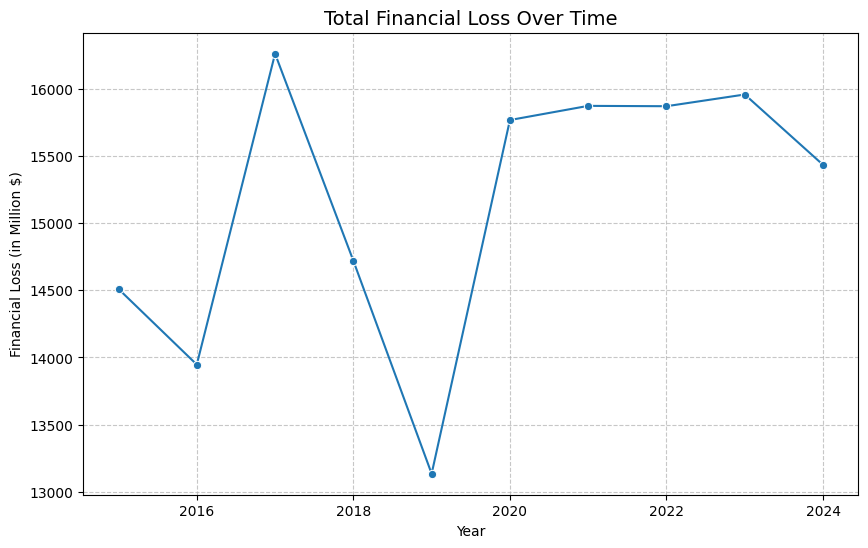

In [34]:
plt.figure(figsize=(10,6))
loss_by_year = df.groupby("Year")["Financial Loss (in Million $)"].sum().reset_index()

sns.lineplot(data=loss_by_year, x="Year", y="Financial Loss (in Million $)", marker="o")
plt.title("Total Financial Loss Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Financial Loss (in Million $)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#####  What are the insight found from the chart?

**Time-Series Analysis: Financial Loss Over Time**
This chart illustrates the trend of total financial losses attributed to cyber attacks over a multi-year period. It helps in understanding the evolving financial impact of cyber threats and identifying periods of heightened activity.

**Key Observations:**

**Overall Trend:** The line's general direction (upward, downward, or flat) indicates whether the financial damage from cyber attacks is increasing, decreasing, or stabilizing over time.

**Sudden Spikes:** Sharp increases in specific years pinpoint periods with exceptionally high-cost cyber incidents. These could correspond to the emergence of new, potent ransomware strains, major state-sponsored attacks, or large-scale data breaches affecting high-value targets.

**Periods of Stability or Decline:** Flattened or dipping sections of the line may suggest the effectiveness of newly implemented security measures across industries or a temporary shift in attackers' tactics.

**Volatility:** A highly fluctuating line indicates an unpredictable and unstable threat landscape, making it difficult for organizations to forecast and budget for cyber-related financial risks.

### Chart - Attack according to sector and year

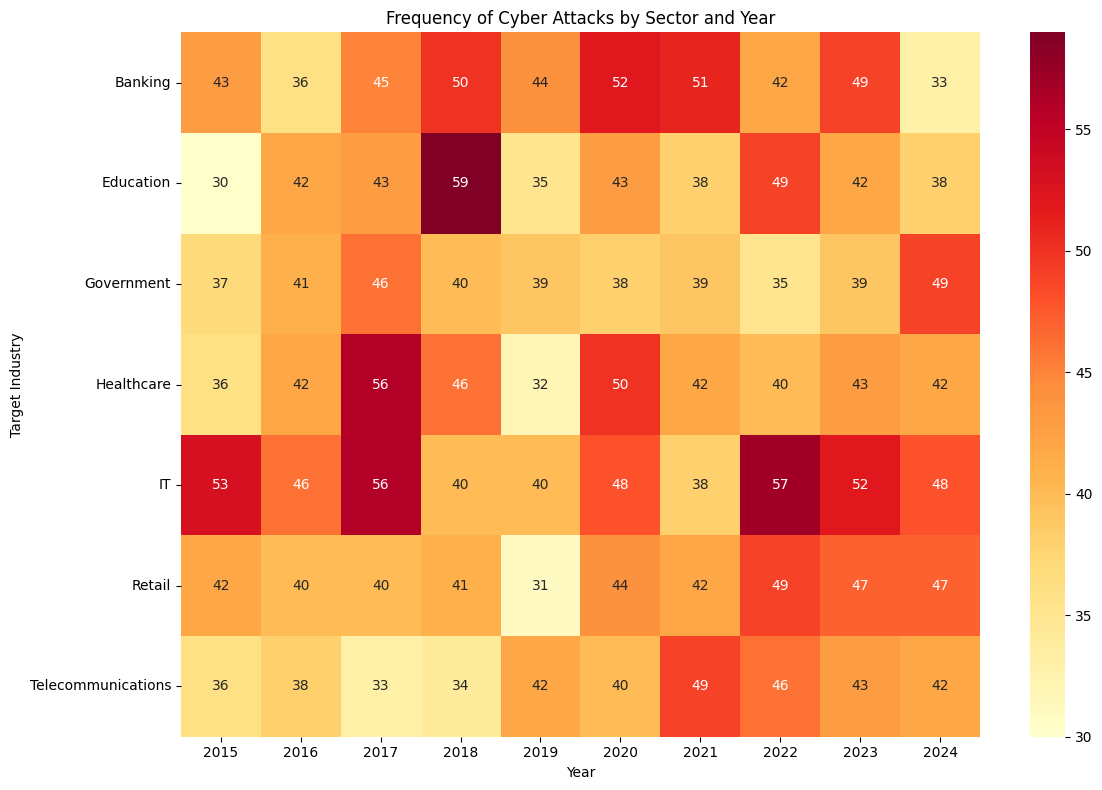

In [35]:

attacks_by_sector_year = pd.crosstab(df['Target Industry'], df['Year'])

plt.figure(figsize=(12, 8))
sns.heatmap(attacks_by_sector_year, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Frequency of Cyber Attacks by Sector and Year')
plt.xlabel('Year')
plt.ylabel('Target Industry')
plt.tight_layout()
plt.show()

##### What are the insight found from the chart?

**IT Sector is consistently targeted:**

 The IT industry has been a frequent target of attacks throughout the entire period from 2015 to 2024, with high numbers of incidents in most years.

**Education Sector shows a high spike in 2018:**

 The number of cyberattacks on the Education sector peaked significantly in 2018, with 59 incidents, which is notably higher than other years for this sector.

**Government Sector has a relatively stable but high number of attacks:**

 The Government sector experiences a consistent and high volume of attacks each year, with the number of incidents remaining in a narrow range.

**Healthcare and Retail Sectors show a general upward trend:**

 While there are year-to-year fluctuations, both the Healthcare and Retail sectors show a gradual increase in the number of cyberattacks over the years, with a notable peak for Healthcare in 2017.

**Banking and Telecommunications sectors have fluctuating attack frequencies:**

 The number of attacks in the Banking and Telecommunications sectors varies from year to year, with no clear long-term trend.

### Chart - Total attacks by sector

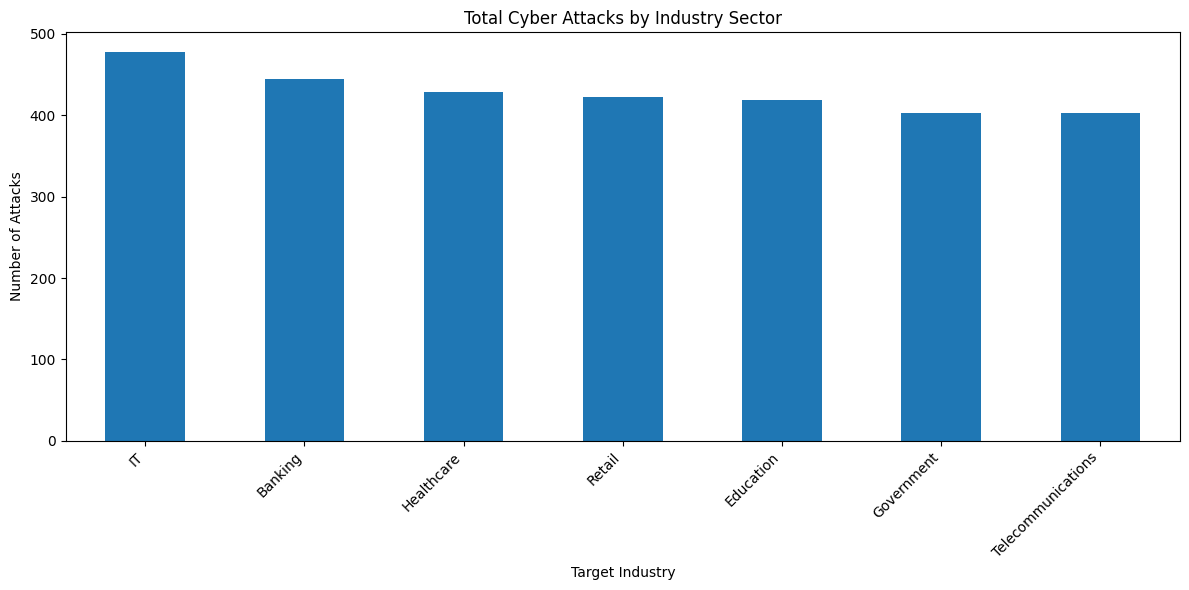

In [36]:
total_by_sector = df['Target Industry'].value_counts()

plt.figure(figsize=(12, 6))
total_by_sector.plot(kind='bar')
plt.title('Total Cyber Attacks by Industry Sector')
plt.xlabel('Target Industry')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### What are the insight found from the chart?

**IT Sector is the most targeted:**

 The IT sector has the highest number of reported attacks with a total of 478 incidents.

**Banking and Healthcare sectors are the next most targeted:**

 Following the IT sector, the Banking and Healthcare sectors are also high-frequency targets with 445 and 429 incidents, respectively.

**Retail and Education are close behind:**

 The Retail and Education sectors experienced a high number of attacks, with 423 and 419 incidents each.

**Government and Telecommunications have the lowest number of attacks among the top sectors:**

 The Government and Telecommunications sectors have the lowest number of attacks among the sectors analyzed, both with 403 incidents.

### Chart - Time-Series: Affected Users Over Time

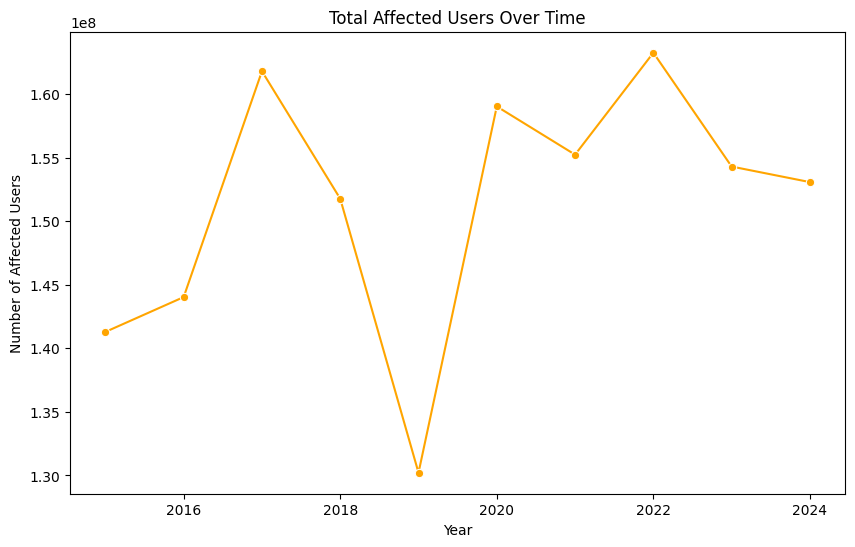

In [37]:
plt.figure(figsize=(10,6))
users_by_year = df.groupby("Year")["Number of Affected Users"].sum().reset_index()
sns.lineplot(data=users_by_year, x="Year", y="Number of Affected Users", marker="o", color="orange")
plt.title("Total Affected Users Over Time")
plt.show()


##### What are the insight found from the chart?

Time-Series Analysis: Affected Users Over Time

This chart shows the total number of users impacted each year, focusing on the human scale of cyberattacks rather than just financial loss.

Key Insights:

Peak Years: Spikes highlight massive breaches, often tied to attacks on major tech, retail, or service providers.

Upward Trend: Indicates attackers are compromising larger datasets over time.

Correlation with Cost:

High correlation → big breaches drive big financial losses.

Low correlation → attacks may target non-financial data (credentials, personal info) for later use.

Shifting Tactics: Declines may signal a move toward smaller, targeted, high-value attacks instead of mass breaches.

### Chart - Average Users Affected by Industry

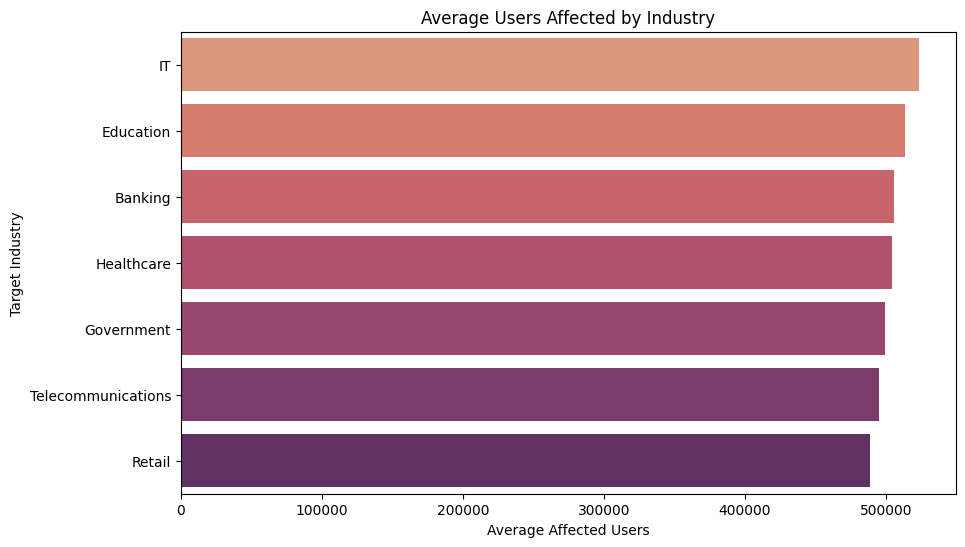

In [38]:
plt.figure(figsize=(10,6))
industry_users = (
    df.groupby("Target Industry")["Number of Affected Users"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

sns.barplot(
    data=industry_users,
    x="Number of Affected Users",
    y="Target Industry",
    hue="Target Industry",
    palette="flare",
    legend=False
)

plt.title("Average Users Affected by Industry")
plt.xlabel("Average Affected Users")
plt.ylabel("Target Industry")
plt.show()


##### What are the insight found from the chart?

Analysis of Average Breach Scale by Industry

This chart shows the average number of users affected per incident in each industry, highlighting the scale of breaches rather than their frequency.

Key Insights:

High-Impact vs. High-Frequency:

Some industries face rare but catastrophic breaches (“whale targets,” e.g., credit bureaus, social media).

Others face both frequent and large-scale attacks, making them constant high-risk sectors.

Data Aggregators:

Industries like Technology, Telecom, Finance, and Government usually top the chart because they handle massive datasets.

Disproportionate Impact:

Retail may see frequent small breaches, while Technology can suffer fewer but exponentially larger breaches.

Nature of Data:

Top industries manage broad datasets (many users), while lower ones may have more sensitive but smaller-scale data.

### Chart -  Loss vs. Resolution Time by Attack Type

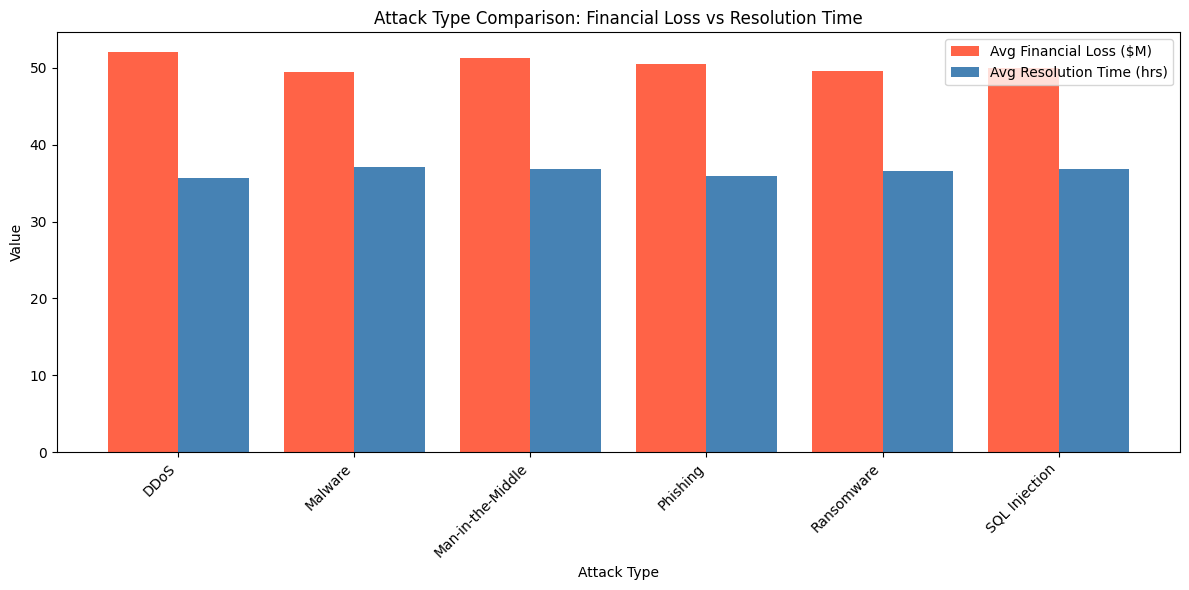

In [39]:
plt.figure(figsize=(12,6))

attack_stats = df.groupby("Attack Type").agg({
    "Financial Loss (in Million $)": "mean",
    "Incident Resolution Time (in Hours)": "mean"
}).reset_index()

x = np.arange(len(attack_stats))
width = 0.4

plt.bar(x - width/2, attack_stats["Financial Loss (in Million $)"], width, label="Avg Financial Loss ($M)", color="tomato")
plt.bar(x + width/2, attack_stats["Incident Resolution Time (in Hours)"], width, label="Avg Resolution Time (hrs)", color="steelblue")

plt.xticks(x, attack_stats["Attack Type"], rotation=45, ha="right")
plt.title("Attack Type Comparison: Financial Loss vs Resolution Time")
plt.xlabel("Attack Type")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

##### What are the insight found from the chart?

This chart compares the average financial loss and average resolution time for each attack type, showing their distinct impact patterns.

Key Insights:

High Cost, High Time: The most destructive attacks (e.g., ransomware) – very expensive and take longest to fix.

High Cost, Low Time: Swift but financially damaging attacks (e.g., BEC, wire fraud) – big monetary hit but quick to resolve technically.

Low Cost, High Time: Operationally draining attacks (e.g., DDoS, spyware) – lower direct costs but cause long-lasting disruption.

Relative Impact: Helps assess whether an attack’s biggest risk is financial loss or operational downtime.

### Chart - Correlation Heatmap

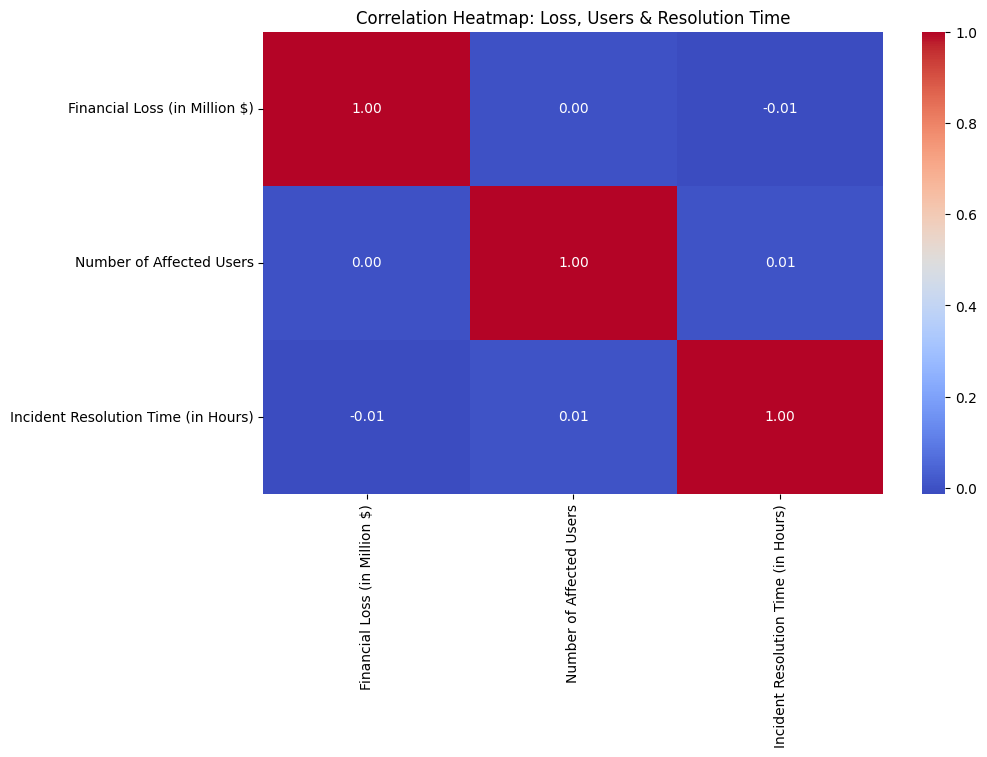

In [40]:
plt.figure(figsize=(10,6))
corr = df[[
    "Financial Loss (in Million $)",
    "Number of Affected Users",
    "Incident Resolution Time (in Hours)"
]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Loss, Users & Resolution Time")
plt.show()


##### What are the insight found from the chart?

This heatmap shows how the core metrics of cyber incidents—financial loss, affected users, and resolution time—are related. Correlation values range from -1 to +1, where higher positive values mean stronger relationships.

Key Insights:

Financial Loss vs. Affected Users:

Strong positive → More users affected = higher cost (fines, recovery, brand damage).

Weak correlation → Some costly attacks (like ransomware) may affect fewer users but still cause huge losses.

Financial Loss vs. Resolution Time:

Strong positive → Longer resolution means higher cost (downtime, investigation fees).

Shows the value of fast incident response.

Affected Users vs. Resolution Time:

Strong positive → Larger-scale attacks take longer to contain and recover from.

In short: The heatmap reveals how user impact, cost, and duration are connected, highlighting why fast detection and response are critical.

### Chart - Financial Loss by Attack Type

In [41]:
fig1 = px.bar(
    df.groupby("Attack Type")["Financial Loss (in Million $)"].sum().reset_index(),
    x="Attack Type",
    y="Financial Loss (in Million $)",
    title="Total Financial Loss by Attack Type (2015-2024)",
    hover_data={"Financial Loss (in Million $)":":.2f"},
    color="Financial Loss (in Million $)"
)

fig1.show()


##### What are the insight found from the chart?

Costliest Attacks: The tallest bars show which attack types caused the highest financial losses.

Comparison: Easy to see which attacks are more damaging (e.g., ransomware vs phishing).

Risk Focus: Organizations should prioritize defenses against the top 2–3 most financially harmful attack types.

In short: The chart reveals the most expensive attack types globally and helps in prioritizing cybersecurity efforts.

### Chart - Number of Attacks by Year

In [42]:
attacks_per_year = df.groupby("Year").size().reset_index(name="Number of Attacks")
fig2 = px.line(
    attacks_per_year,
    x="Year",
    y="Number of Attacks",
    title="Cyber Attacks Over the Years",
    markers=True
)

fig2.show()

##### What are the insight found from the chart?

Trend: Shows if cyberattacks are rising, falling, or fluctuating from 2015–2024.

Peaks: High points = years with the most widespread attacks (often tied to global events).

Comparison: Recent years usually show more attacks than early years → proving the threat landscape is worsening.

In short: The chart highlights the growth and peak years of cyberattacks, showing how threats have intensified over time.

### Chart - Attack Type → Target Industry → Country


In [43]:
fig3 = px.sunburst(
    df,
    path=["Attack Type", "Target Industry", "Country"],
    values="Financial Loss (in Million $)",
    title="Attack Distribution by Type, Industry, and Country",
    color="Financial Loss (in Million $)",
    hover_data={"Financial Loss (in Million $)":":.2f"}
)

fig3.show()

##### What are the insight found from the chart?

Dominant Attack Type: The largest center slice shows which attack type causes the highest global losses.

Industry Impact: Bigger slices within each attack type = industries most targeted.

Country Hotspots: Outer ring highlights countries with the highest losses in each industry.

Risk Patterns: Some industries appear under multiple attack types, showing a broad attack surface.

In short: The chart reveals which attack type dominates, which industries and countries are hit hardest, and which sectors face multiple threats.

### Scatter plot - Financial Loss vs Affected Users

In [44]:
fig4 = px.scatter(
    df,
    x="Number of Affected Users",
    y="Financial Loss (in Million $)",
    color="Attack Type",
    size="Financial Loss (in Million $)",
    hover_name="Country",
    title="Financial Loss vs Affected Users (Colored by Attack Type)",
    log_x=True,  # log scale to handle large variation
    log_y=True
)

fig4.show()

##### What are the insight found from the chart?

The chart reveals a trade-off between financial loss and user exposure — some attacks are “wide but shallow,” others are “narrow but deep,” and the outliers show the most devastating breaches.

# Thank you